# Prepare Data


In [1]:
import pandas as pd

In [2]:
path= "/kaggle/input/nlp-project/problem_and_human_solutions_list_filtered_cleaned_with_complexities.jsonl"
# Load the JSONL file into a pandas DataFrame
df_phsl_cleaned = pd.read_json(path, lines=True)
df_phsl_cleaned.head()

,problem_id,problem_name,description,correct_solution_list
0,0,339_C. Xenia and Weights,Xenia has a set of weights and pan scales. Eac...,"[{'solution_id': '0_0', 'solution_code': '__au..."
1,1,1547_E. Air Conditioners,On a strip of land of length n there are k air...,"[{'solution_id': '1_0', 'solution_code': 'def ..."
2,2,268_C. Beautiful Sets of Points,Manao has invented a new mathematical term — a...,"[{'solution_id': '2_0', 'solution_code': 'if _..."
3,3,478_C. Table Decorations,"You have r red, g green and b blue balloons. T...","[{'solution_id': '3_0', 'solution_code': 'a = ..."
4,4,5_C. Longest Regular Bracket Sequence,This is yet another problem dealing with regul...,"[{'solution_id': '4_0', 'solution_code': 'stri..."


In [3]:
df_phsl_cleaned.shape

(3014, 4)

In [4]:
df_phsl_cleaned["correct_solution_list"][0][:2]

[{'solution_id': '0_0',
  'solution_code': '__author__ = \'ratnesh.mishra\'\n\nweights = map(int, input())\n\nweights = [cnt for cnt, x in enumerate(weights, 1) if x]\n\nm = int(input())\n\nstate = [(0, 0, 0, [])]\n\nres = "NO"\nwhile state:\n    w, b, k, l = state.pop()\n\n    if k == m:\n        res = \'YES\\n\' + \' \'.join(map(str, l))\n        break\n\n    for wt in weights:\n        if wt != w and wt > b:\n            state.append((wt, wt-b, k+1, l+[wt]))\n\nprint(res)\n\n',
  'time_complexity': 'O(1)',
  'space_complexity': 'O(n**2)'},
 {'solution_id': '0_2',
  'solution_code': "import sys\nsys.setrecursionlimit (1000000)\n\ntmp = list (map (int,(list(input()))))\nw = [i+1 for i in range (len (tmp)) if tmp[i] == 1]\nm = int (input ())\n\ndef dfs (b,p,s):\n  if s == m:\n    return [p]\n  for i in w:\n    if i != p and i > b:\n      ret = dfs (i-b,i,s+1)\n      if ret:\n        ret.append (p)\n        return ret\n  return None\n\nret = dfs (0,0,0)\nif ret:\n  print ('YES')\n  ret.

In [5]:
#!pip install transformers

In [6]:
import torch
import numpy as np

In [7]:
# Prepare a list to collect the flattened rows
flat_rows = []

# Loop over each problem
for _, row in df_phsl_cleaned.iterrows():
    problem_id = row["problem_id"]
    solutions = row["correct_solution_list"]

    # Each solution in the list
    for sol in solutions:
        flat_rows.append({
            "problem_id": problem_id,
            "solution_id": sol["solution_id"],
            "solution_code": sol["solution_code"],
            "time_complexity": sol["time_complexity"],
            "space_complexity": sol["space_complexity"]
        })

# Convert to a new DataFrame
flat_df = pd.DataFrame(flat_rows)

# Optional: drop rows with missing labels or code
flat_df = flat_df.dropna(subset=["solution_code", "time_complexity", "space_complexity"])

# Check result
flat_df.head()


,problem_id,solution_id,solution_code,time_complexity,space_complexity
0,0,0_0,__author__ = 'ratnesh.mishra'\n\nweights = map...,O(1),O(n**2)
1,0,0_2,import sys\nsys.setrecursionlimit (1000000)\n\...,O(1),O(1)
2,0,0_4,# Target - Expert on CF\n# Be Humblefool\n\nim...,O(1),O(1)
3,0,0_6,"# import sys\n# sys.stdin = open(""F:\\Scripts\...",O(1),O(1)
4,0,0_8,"to_print = []\ndef dfs(d, ini, s, depth, m):\n...",O(1),O(1)


In [8]:
flat_df.shape

(1041578, 5)

In [9]:
!pip install datasets
#!pip install --upgrade transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 4.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.9.0.13 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cudnn-cu12==9.1.0.70; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cudnn-cu12 9.3.0.75 which is incompatible.
torch 2.6.0+cu124 requires nvid

In [10]:
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from datasets import Dataset, DatasetDict
from sklearn.metrics import classification_report, confusion_matrix

2025-05-16 14:43:01.327994: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747406581.556454      99 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747406581.626915      99 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:
# You can choose CodeBERT or a similar model
MODEL_NAME = "microsoft/codebert-base"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [12]:
print("vocabulary size: ", len(tokenizer.vocab))

vocabulary size:  50265


In [13]:
#print(tokenizer.vocab)

In [14]:
code_sample = "def binary_search(arr, x): return -1"

# Tokenizzazione (con padding e truncation per sicurezza)
inputs = tokenizer(code_sample, return_tensors="pt", padding=True, truncation=True)

In [15]:
print("input text: "+ code_sample)
print("input tokenized ids: " + str(inputs.input_ids[0]))
print("tokenized: ", [tokenizer.decode(id) for id in inputs.input_ids[0]])

input text: def binary_search(arr, x): return -1
input tokenized ids: tensor([    0,  9232, 32771,  1215, 21061,  1640,  6166,     6,  3023,  3256,
          671,   111,   134,     2])
tokenized:  ['<s>', 'def', ' binary', '_', 'search', '(', 'arr', ',', ' x', '):', ' return', ' -', '1', '</s>']


In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [17]:
time_classes= flat_df["time_complexity"].unique()
space_classes= flat_df["space_complexity"].unique()

In [18]:
print("Number of Time Classes labels: ", len(time_classes))
print("Number of Space Classes labels: ", len(space_classes))
print("Time Classes: ", time_classes[:20])#Only the first 20
print("Space Classes: ",space_classes[:20])#Only the first 20

Number of Time Classes labels:  439
Number of Space Classes labels:  262
Time Classes:  ['O(1)' 'O(n)' 'O(nlogn)' 'O(n**2)' 'O(n+m)' 'O(nlogn*m)' 'O(logn)'
 'O(n*m)' 'O(nlogn**2)' 'O(n*mlogm)' 'O(n*logm)' 'O(n+m**2)'
 'O(n+m)log(n+m)' 'O(nlogn+mlogm)+(k+l)' 'O(nlogn+m)' 'O(n+mlogm)'
 'O(n+(m+k))' 'O(nlogn+mlogm)' 'O((n+m)+k)' 'O(nlogn+(m+k))']
Space Classes:  ['O(n**2)' 'O(1)' 'O(n)' 'O(n+m)' 'O(n*m)' 'O(n*mlogm)' 'O(logn)'
 'O(n*m**2)' 'O(n**2*m)' 'O(nlogn)' 'O(logn*logm)' 'O((n+m)+k)' 'O(n+m+k)'
 'O((n**2)+m)' 'O(n+(m**2))' 'O(n+(m*k))' 'O(nlogn+m)' 'O(n**2+m)'
 'O(nlogn*m)' 'O(n+m**2)']


In [19]:
import collections
import re
import sympy # Importa sympy per sympy.srepr e sympy.default_sort_key
from sympy import Symbol, Function, Add, Mul, Pow
from sympy.parsing.sympy_parser import parse_expr, standard_transformations, implicit_multiplication_application

# Trasformazioni per il parser di sympy
sympy_transformations = standard_transformations + (implicit_multiplication_application,)

log_func_sympy = Function('log_func_sympy')
KNOWN_VARIABLE_NAMES = "n m k l u v w p a b c x y z N M K L".split()

def _preprocess_expr_string(expr_str: str) -> str:
    processed_str = expr_str.replace('log', 'log_func_sympy')

    processed_str = re.sub(
        r'([a-zA-Z0-9_]+)(log_func_sympy)\1(?![a-zA-Z0-9_*(])',
        r'\1*\2(\1)',
        processed_str
    )
    processed_str = re.sub(
        r'(log_func_sympy)([a-zA-Z0-9_]+)(?!\s*\()',
        r'\1(\2)',
        processed_str
    )
    # Fase 4: var_name log_func_sympy( -> var_name * log_func_sympy(
    processed_str = re.sub(
        r'([a-zA-Z_][a-zA-Z0-9_]*|[0-9]+)(log_func_sympy\()', 
        r'\1*\2',
        processed_str
    )
    # Fase 5: )var_name -> )*var_name
    processed_str = re.sub(
        r'(\))([a-zA-Z_][a-zA-Z0-9_]*|[0-9]+)', 
        r'\1*\2',
        processed_str
    )
    # Fase 6: var_name( -> var_name*(  (escludendo log_func_sympy() che è già gestito)
    # Questo aiuta per n(m+k) -> n*(m+k)
    # Il lookahead (?!) assicura che non stiamo reinserendo * per log_func_sympy
    processed_str = re.sub(
        r'([a-zA-Z_][a-zA-Z0-9_]*|[0-9]+)(\((?!log_func_sympy))',
        r'\1*\2',
        processed_str
    )
    return processed_str


def _normalize_sympy_expression(sympy_expr, original_complexity_string_for_debug: str):
    # print(f"DEBUG: _normalize_sympy_expression per '{original_complexity_string_for_debug}'")
    # print(f"  Input sympy_expr: {str(sympy_expr)}")

    if not hasattr(sympy_expr, 'free_symbols') or not sympy_expr.free_symbols:
        # print("  Nessun simbolo libero o expr non ha free_symbols, restituendo così com'è.")
        return sympy_expr
    
    current_expr = sympy_expr 
    original_symbols = current_expr.free_symbols
    # print(f"  free_symbols: {original_symbols}")

    sorted_original_vars_str = sorted([str(s) for s in original_symbols])
    # print(f"  sorted_original_vars_str: {sorted_original_vars_str}")

    canonical_var_map = {
        Symbol(original_name_str): Symbol(f"v{i:02d}")
        for i, original_name_str in enumerate(sorted_original_vars_str)
    }
    # print(f"  canonical_var_map: {canonical_var_map}")

    expr_with_canonical_vars = current_expr.subs(canonical_var_map)
    # print(f"  expr_with_canonical_vars: {str(expr_with_canonical_vars)}")
    
    def sort_commutative_args_recursive(expr_to_sort):
        if not hasattr(expr_to_sort, 'args') or not expr_to_sort.args:
            return expr_to_sort
        
        # Applica ricorsivamente prima di ordinare
        normalized_args = [sort_commutative_args_recursive(arg) for arg in expr_to_sort.args]
        
        rebuilt_expr = expr_to_sort
        if hasattr(expr_to_sort, 'func'):
            rebuilt_expr = expr_to_sort.func(*normalized_args) # Ricostruisci con argomenti normalizzati

        if isinstance(rebuilt_expr, (Add, Mul)):
            # Ora ordina gli argomenti dell'espressione ricostruita
            # (che sono già stati normalizzati ricorsivamente)
            final_args = sorted(rebuilt_expr.args, key=sympy.default_sort_key)
            return rebuilt_expr.func(*final_args)
        
        return rebuilt_expr # Se non Add o Mul, restituisci l'espressione con argomenti normalizzati

    fully_normalized_expr = sort_commutative_args_recursive(expr_with_canonical_vars)
    # print(f"  fully_normalized_expr: {str(fully_normalized_expr)}")
    return fully_normalized_expr


def get_canonical_form_with_commutativity(complexity_string: str) -> str:
    # print(f"\nDEBUG: get_canonical_form per '{complexity_string}'")
    if not (complexity_string.startswith("O(") and complexity_string.endswith(")")):
        # print(f"  Non è una notazione O-grande valida. Restituendo: {complexity_string}")
        return complexity_string

    expression_str = complexity_string[2:-1]

    if expression_str == "1":
        # print("  Caso speciale '1'. Restituendo: 1")
        return "1"

    preprocessed_expr_str = _preprocess_expr_string(expression_str)
    # print(f"  Stringa preprocessata: '{preprocessed_expr_str}' (da '{expression_str}')")

    local_symbols_for_parser = {'log_func_sympy': log_func_sympy}
    for var_name in KNOWN_VARIABLE_NAMES:
        local_symbols_for_parser[var_name] = Symbol(var_name)
    
    sympy_expr = None
    try:
        sympy_expr = parse_expr(
            preprocessed_expr_str,
            local_dict=local_symbols_for_parser,
            transformations=sympy_transformations,
            evaluate=False 
        )
        # print(f"  Espressione Sympy parsata: {str(sympy_expr)}")
    except Exception as e:
        # print(f"  Errore parsing Sympy: '{complexity_string}' (preproc: '{preprocessed_expr_str}') | Errore: {e}")
        return f"ERROR_PARSING_FOR_{complexity_string}"

    if sympy_expr is None:
        return f"ERROR_PARSING_FOR_{complexity_string}_UNKNOWN"

    normalized_sympy_expr = _normalize_sympy_expression(sympy_expr, complexity_string)
    final_key = str(normalized_sympy_expr)
    # print(f"  Chiave canonica finale generata: '{final_key}'")
    return final_key


def group_structurally_similar(space_classes_list: list[str]) -> list[list[str]]:
    groups = collections.defaultdict(list)
    # print("\n--- Generazione Chiavi (con codice corretto) ---")
    for sc_string in space_classes_list:
        canonical_key = get_canonical_form_with_commutativity(sc_string)
        # print(f"Originale: {sc_string:<30} | Chiave: {canonical_key}")
        groups[canonical_key].append(sc_string)
    # print("--- Fine Generazione Chiavi ---\n")
    return list(groups.values())

In [20]:

space_classes = group_structurally_similar(space_classes)
time_classes = group_structurally_similar(time_classes)
#Print the group
#for i, group in enumerate(grouped_general_results):
#    print(f"Gruppo Generale {i+1}: {group}")

In [21]:
print("Number of Time Classes labels: ", len(time_classes))
print("Number of Space Classes labels: ", len(space_classes))
print("Time Classes: ", time_classes[:20])#Only the first 20
print("Space Classes: ",space_classes[:20])#Only the first 20

Number of Time Classes labels:  406
Number of Space Classes labels:  219
Time Classes:  [['O(1)'], ['O(n)'], ['O(nlogn)'], ['O(n**2)'], ['O(n+m)'], ['O(nlogn*m)'], ['O(logn)'], ['O(n*m)'], ['O(nlogn**2)'], ['O(n*mlogm)'], ['O(n*logm)'], ['O(n+m**2)', 'O(n+(m**2))'], ['O(n+m)log(n+m)'], ['O(nlogn+mlogm)+(k+l)'], ['O(nlogn+m)'], ['O(n+mlogm)'], ['O(n+(m+k))', 'O((n+m)+k)', 'O(n+m+k)'], ['O(nlogn+mlogm)'], ['O(nlogn+(m+k))'], ['O(n+m)+(klogk+llogl)']]
Space Classes:  [['O(n**2)'], ['O(1)'], ['O(n)'], ['O(n+m)'], ['O(n*m)'], ['O(n*mlogm)'], ['O(logn)'], ['O(n*m**2)', 'O(n*(m**2))'], ['O(n**2*m)', 'O((n**2)*m)'], ['O(nlogn)'], ['O(logn*logm)'], ['O((n+m)+k)', 'O(n+m+k)', 'O(n+(m+k))'], ['O((n**2)+m)', 'O(n**2+m)'], ['O(n+(m**2))', 'O(n+m**2)'], ['O(n+(m*k))'], ['O(nlogn+m)'], ['O(nlogn*m)'], ['O(n+mlogm)'], ['O(n*m**2*k)', 'O(n*(m**2)*k)'], ['O(n*m*k**2)', 'O(n*m*(k**2))']]


In [22]:
complexity_map = {}
for group in time_classes:
    canonical_form = group[0]  # La prima complessità del gruppo è quella canonica
    for variant in group:
        complexity_map[variant] = canonical_form


flat_df['time_complexity'] = flat_df['time_complexity'].apply(lambda x: complexity_map.get(x, x))

In [23]:
complexity_map = {}
for group in space_classes:
    canonical_form = group[0]  # La prima complessità del gruppo è quella canonica
    for variant in group:
        complexity_map[variant] = canonical_form


flat_df['space_complexity'] = flat_df['space_complexity'].apply(lambda x: complexity_map.get(x, x))

In [24]:
time_classes_ex= flat_df["time_complexity"].unique()
space_classes_ex= flat_df["space_complexity"].unique()

print(len(time_classes_ex))
print(len(space_classes_ex))

406
219


In [25]:
top_time_classes_labels = flat_df["time_complexity"].value_counts().nlargest(7).index.tolist()
top_time_classes_occurences = flat_df["time_complexity"].value_counts().nlargest(7).tolist()
print("Top 10 Time Complexities:")
for label, occ in zip(top_time_classes_labels, top_time_classes_occurences):
    print(f"{label}: {occ}")


Top 10 Time Complexities:
O(n): 432454
O(1): 231839
O(nlogn): 105453
O(n**2): 83171
O(n*m): 56610
O(n+m): 37593
O(logn): 19463


In [26]:
top_space_classes_labels = flat_df["space_complexity"].value_counts().nlargest(7).index.tolist()
top_space_classes_occurences = flat_df["space_complexity"].value_counts().nlargest(7).tolist()
print("Top 10 Space Complexities:")
for label, occ in zip(top_space_classes_labels, top_space_classes_occurences):
    print(f"{label}: {occ}")

Top 10 Space Complexities:
O(n): 537972
O(1): 294934
O(n*m): 55585
O(n**2): 37183
O(n+m): 34146
O(logn): 26314
O(nlogn): 14298


In [27]:
# Create a copy of flat_df to avoid modifying the original DataFrame
filtered_df = flat_df.copy()

# Apply the transformations as before
filtered_df["time_complexity"] = flat_df["time_complexity"].apply(
    lambda l: l if l in top_time_classes_labels else "Other"
)

filtered_df["space_complexity"] = flat_df["space_complexity"].apply(
    lambda l: l if l in top_space_classes_labels else "Other"
)

# Riassegna gli indici
filtered_df.reset_index(drop=True, inplace=True)

In [28]:
# Codifica per time_complexity
time_encoder = LabelEncoder()
filtered_df["time_label"] = time_encoder.fit_transform(filtered_df["time_complexity"])

# Codifica per space_complexity
space_encoder = LabelEncoder()
filtered_df["space_label"] = space_encoder.fit_transform(filtered_df["space_complexity"])


In [29]:
filtered_df[filtered_df["space_complexity"]=="Other"].head()

,problem_id,solution_id,solution_code,time_complexity,space_complexity,time_label,space_label
292,2,2_127,"n,m=list(map(int,input().split()))\nc=[]\ng=[]...",Other,Other,7,7
1059,8,8_77,"n = int(input())\na = list(map(int, input().sp...",O(nlogn),Other,6,7
1077,8,8_105,#_____________________________________________...,O(nlogn),Other,6,7
1164,8,8_247,def f(x):\n i = 0\n z = x\n while z %...,O(nlogn),Other,6,7
1191,8,8_295,"n = int(input())\na = list(map(int, input().sp...",O(nlogn),Other,6,7


# Space Complexity Classifier

In [30]:
full_unbalanced_df=filtered_df.copy()

In [31]:
# Imposta massimo per classe
max_per_class = 10000
# Prendi max_per_class esempi per ogni classe
filtered_df = (
    filtered_df
    .groupby("space_label", group_keys=False)  # eviti indici multi-livello
    .sample(n=max_per_class, random_state=42)           # riproducibilità con seed
    .reset_index(drop=True)
    .copy()# <-- Questo rende tutto indipendente
)


In [32]:
filtered_df.shape

(80000, 7)

In [33]:
filtered_df["space_label"].value_counts()

space_label
0    10000
1    10000
2    10000
3    10000
4    10000
5    10000
6    10000
7    10000
Name: count, dtype: int64

In [34]:
space_encoded_labels = filtered_df["space_label"]
print(space_encoded_labels.value_counts())

id2label_space = {idx: label for idx, label in enumerate(space_encoder.classes_)}
label2id_space = {label: idx for idx, label in id2label_space.items()}
print(id2label_space)
print(label2id_space)

space_label
0    10000
1    10000
2    10000
3    10000
4    10000
5    10000
6    10000
7    10000
Name: count, dtype: int64
{0: 'O(1)', 1: 'O(logn)', 2: 'O(n)', 3: 'O(n**2)', 4: 'O(n*m)', 5: 'O(n+m)', 6: 'O(nlogn)', 7: 'Other'}
{'O(1)': 0, 'O(logn)': 1, 'O(n)': 2, 'O(n**2)': 3, 'O(n*m)': 4, 'O(n+m)': 5, 'O(nlogn)': 6, 'Other': 7}


In [37]:
from sklearn.model_selection import train_test_split

# Suddivisione per space complexity
train_df_space, test_df_space = train_test_split(
    filtered_df,
    test_size=0.2,
    stratify=filtered_df["space_label"],
    random_state=42
)

In [38]:
train_df_space, valid_df_space = train_test_split(
    train_df_space,
    test_size=0.2,
    stratify=train_df_space["space_label"],
    random_state=42
)

In [39]:
# Rimuove righe con codice sorgente mancante
train_df_space = train_df_space.dropna(subset=["solution_code"])
valid_df_space = valid_df_space.dropna(subset=["solution_code"])

# Normalizza il testo del codice sorgente
train_df_space["solution_code"] = train_df_space["solution_code"].apply(lambda x: x.strip())
valid_df_space["solution_code"] = valid_df_space["solution_code"].apply(lambda x: x.strip())


In [40]:
print("Train Shape: ", train_df_space.shape)
print("Valid Shape: ", valid_df_space.shape)
print("Test Shape: ", test_df_space.shape)

Train Shape:  (51200, 7)
Valid Shape:  (12800, 7)
Test Shape:  (16000, 7)


In [41]:
# Crea i dataset per time complexity
train_dataset_space = Dataset.from_pandas(train_df_space[["solution_code", "space_label"]])
val_dataset_space = Dataset.from_pandas(valid_df_space[["solution_code", "space_label"]])
test_dataset_space = Dataset.from_pandas(test_df_space[["solution_code", "space_label"]])


In [43]:
data = DatasetDict()
data['train'] = train_dataset_space
data['validation'] = val_dataset_space
data['test'] = test_dataset_space

In [44]:
print(data)

DatasetDict({
    train: Dataset({
        features: ['solution_code', 'space_label', '__index_level_0__'],
        num_rows: 51200
    })
    validation: Dataset({
        features: ['solution_code', 'space_label', '__index_level_0__'],
        num_rows: 12800
    })
    test: Dataset({
        features: ['solution_code', 'space_label', '__index_level_0__'],
        num_rows: 16000
    })
})


In [45]:
def tokenize_function(examples):
    return tokenizer(examples["solution_code"], padding=True, truncation=True)


In [47]:
tokenized_data = data.map(tokenize_function, batched=True)

Map:   0%|          | 0/51200 [00:00<?, ? examples/s]

Map:   0%|          | 0/12800 [00:00<?, ? examples/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

In [48]:
tokenized_data["train"]

Dataset({
    features: ['solution_code', 'space_label', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 51200
})

In [49]:
tokenized_data=tokenized_data.remove_columns("__index_level_0__")#present because of the pandas conversion

In [50]:
tokenized_data = tokenized_data.map(lambda x: {"label": x["space_label"]}, remove_columns=["space_label"])#rename the column

Map:   0%|          | 0/51200 [00:00<?, ? examples/s]

Map:   0%|          | 0/12800 [00:00<?, ? examples/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

In [51]:
tokenized_data["train"][0].keys()

dict_keys(['solution_code', 'input_ids', 'attention_mask', 'label'])

In [53]:

print("Max len: ",len(tokenized_data["train"][0]["input_ids"]))
print("Time label: ", tokenized_data["train"][0]["label"])
print("Tokenized data: ",tokenized_data["train"][0]["input_ids"])

Max len:  512
Time label:  6
Tokenized data:  [0, 506, 5457, 48081, 50118, 1990, 939, 11, 1186, 1640, 245, 3256, 50118, 1437, 1437, 1437, 3023, 5457, 8135, 49123, 44154, 45803, 128, 43, 50118, 1437, 1437, 1437, 114, 128, 134, 108, 11, 3023, 35, 50118, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 856, 5457, 646, 118, 6, 3023, 4, 18480, 45803, 134, 27645, 742, 50118, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1108, 50118, 17265, 1640, 10155, 1640, 176, 12, 506, 10975, 288, 45587, 2055, 15428, 1640, 176, 12, 506, 10975, 134, 742, 35122, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [54]:
print(tokenizer.decode(tokenized_data["train"][0]["input_ids"])) #just have a look to the decoded soluton from input_ids

<s>f = []
for i in range(5):
    x = input().split(' ')
    if '1' in x:
        f = [i, x.index('1')]
        break
print(abs(2-f[0]) + abs(2-f[1]))</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><p

### Training CodeBert Model

In [55]:
from transformers import RobertaModel, RobertaPreTrainedModel, RobertaConfig
from transformers.modeling_outputs import SequenceClassifierOutput
import torch.nn as nn
import torch

In [56]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Numero di classi
num_labels = len(time_encoder.classes_)
print("Number of Classes: ", num_labels)

# Nome del modello preaddestrato
model_name = "microsoft/codebert-base"

# Modello con classificazione (es. n classi)
space_model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
print(space_model)

Number of Classes:  8


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [57]:
def count_trainable_parameters(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}")
    return total_params, trainable_params

# Esegui la funzione sul tuo modello
count_trainable_parameters(space_model)

Total parameters: 124,651,784
Trainable parameters: 124,651,784


(124651784, 124651784)

In [ ]:
'''for name, param in time_model.roberta.named_parameters():
    if "layer" in name:
        # Sblocca gli ultimi 2-4 layer (ad esempio)
        layer_number = int(name.split('.')[2])  # Estrai il numero del layer
        if layer_number >= 7:  # Sblocca layer da 10 in poi
            param.requires_grad = True
        else:
            param.requires_grad = False
    elif "pooler" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False  # Congela altri parametri'''

In [58]:
count_trainable_parameters(space_model)

Total parameters: 124,651,784
Trainable parameters: 124,651,784


(124651784, 124651784)

In [59]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [60]:
import transformers
print(transformers.__version__)

4.51.3


In [61]:
#!pip uninstall transformers -y
!pip install transformers==4.28.0
from transformers import TrainingArguments

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.0/110.0 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 68.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kaggle-environments 1.16.11 requires transformers>=4.33.1, but you have transformers 4.28.0 which is incompatible.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.

In [63]:
from transformers import TrainingArguments, EarlyStoppingCallback

training_args = TrainingArguments(
    output_dir="/kaggle/working/results",
    eval_strategy="steps",      # Valuta ogni X step
    save_strategy="steps",            # Salva ogni X step
    eval_steps=500,
    save_steps=500,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,          # Eval loss → più basso è meglio
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    learning_rate=1e-4,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    save_total_limit=2,
    fp16=True,
    report_to="none"
)


In [64]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }


In [65]:
trainer = Trainer(
    model=space_model,
    args=training_args,
    train_dataset=tokenized_data['train'],
    eval_dataset=tokenized_data['validation'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
  )

/tmp/ipykernel_99/737934255.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,1.346600,1.297510,0.531328,0.611211,0.531328,0.537957
1000,1.201000,1.134157,0.592187,0.619910,0.592187,0.591714
1500,1.114000,1.014635,0.645312,0.656778,0.645312,0.644715
2000,0.994500,0.986840,0.659219,0.671868,0.659219,0.660267


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


In [ ]:
# Salva il modello
model_path = '/kaggle/working/codebert_large_finetuned'  # Percorso dove salvare il modello
space_model.save_pretrained(model_path)
# Salva anche il tokenizer (per usarlo successivamente)
tokenizer.save_pretrained(model_path)


In [ ]:
!zip -r codbert_large_finetuned.zip /kaggle/working/codebert_large_finetuned

In [ ]:
import shutil
shutil.make_archive("/kaggle/working/results_archive", 'zip', "/kaggle/working/results")

In [ ]:
import shutil
shutil.make_archive("/kaggle/working/codebert_large_finetuned", 'zip', "/kaggle/working/codebert_large_finetuned")

### CodeBert Model Evaluation

In [110]:
space_model.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [111]:
preds = trainer.predict(tokenized_data['test'])
preds

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


PredictionOutput(predictions=array([[-1.9675996 , -3.060194  ,  2.486605  , ...,  4.9283695 ,
        -1.9422324 ,  1.0200603 ],
       [ 6.731412  , -0.4681141 ,  1.87253   , ..., -1.0490054 ,
        -2.439162  , -2.8099666 ],
       [ 2.381304  ,  6.3755016 ,  0.19779426, ..., -1.1229632 ,
        -3.4231484 ,  0.20222175],
       ...,
       [-0.7640035 , -2.4134798 ,  1.7981637 , ..., -3.0724578 ,
         6.00479   , -0.3545704 ],
       [-1.7189455 , -2.5621057 ,  0.893293  , ...,  0.11041799,
        -2.5000093 ,  4.4036713 ],
       [-2.2855422 , -3.7347875 , -1.4683686 , ...,  2.4804294 ,
        -1.528127  ,  2.8515415 ]], dtype=float32), label_ids=array([5, 0, 1, ..., 6, 7, 5]), metrics={'test_loss': 0.7989030480384827, 'test_accuracy': 0.7491875, 'test_precision': 0.7540628060232237, 'test_recall': 0.7491875, 'test_f1': 0.746205900668681, 'test_runtime': 298.4693, 'test_samples_per_second': 53.607, 'test_steps_per_second': 1.675})

In [112]:
y_pred = torch.argmax(torch.tensor(preds.predictions), dim=1).numpy()
y_pred.shape

(16000,)

In [113]:
label_names = space_encoder.classes_
print(label_names)
test_target= tokenized_data["test"]["label"]
test_target= np.array(test_target)
print(test_target.shape)

['O(1)' 'O(logn)' 'O(n)' 'O(n**2)' 'O(n*m)' 'O(n+m)' 'O(nlogn)' 'Other']
(16000,)


In [114]:
print(classification_report(test_target, y_pred, target_names=label_names))

              precision    recall  f1-score   support

        O(1)       0.80      0.57      0.67      2000
     O(logn)       0.78      0.90      0.84      2000
        O(n)       0.75      0.60      0.67      2000
     O(n**2)       0.70      0.70      0.70      2000
      O(n*m)       0.82      0.88      0.85      2000
      O(n+m)       0.79      0.77      0.78      2000
    O(nlogn)       0.76      0.78      0.77      2000
       Other       0.63      0.79      0.70      2000

    accuracy                           0.75     16000
   macro avg       0.75      0.75      0.75     16000
weighted avg       0.75      0.75      0.75     16000



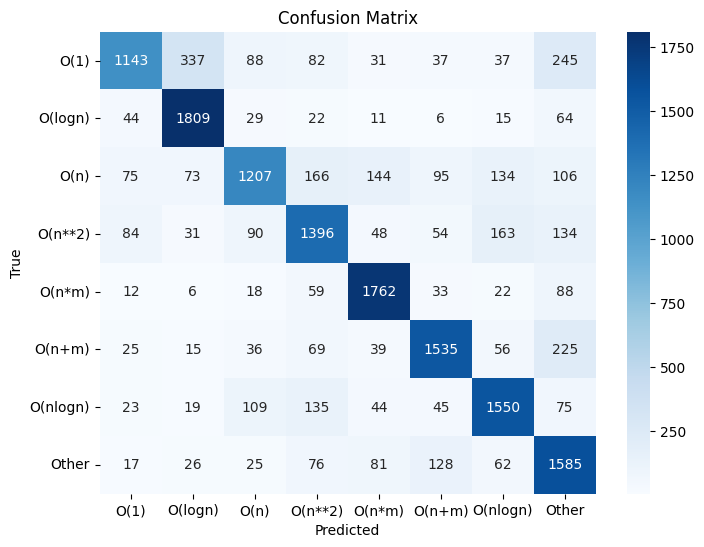

In [115]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(test_target, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=space_encoder.classes_, yticklabels=space_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## Refine FineTuning

In [116]:
#Load the model already finetuned for further processing 
model_path="/kaggle/working/results/checkpoint-6000"
space_model=AutoModelForSequenceClassification.from_pretrained(model_path)